In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('WalmartSalesData.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## DATA UNDERSTANDING

In [3]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
You should consider upgrading via the '/Users/himanshi/.pyenv/versions/3.8.13/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# IMPORTING APPROPRIATE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')


print("Setup Complete")

Setup Complete


In [8]:
# READ THE CSV FILES
df_raw_data=pd.read_csv("train.csv.zip")
display(df_raw_data.head())

# load stores data
df_store_data=pd.read_csv("stores.csv")
display(df_store_data.head())

# load features data
df_feature_data=pd.read_csv("features.csv.zip")
display(df_feature_data.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
# Need to do merge
df=df_raw_data.merge(df_store_data,on='Store')
display(df.head())

# column to use in from
columns_using=['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df=df.merge(df_feature_data[columns_using],on=['Store','Date'])
display(df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106


## EDA

In [10]:
# Checking the data types
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [11]:
# fixed the datatypes for columns and create new columns
df[['Store','Dept']]=df[['Store','Dept']].astype(str)
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month

In [12]:
# checking the datatypes after changing
df.dtypes

Store                   object
Dept                    object
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Month                    int32
dtype: object

In [13]:
# checking the dataframe for new column that we create
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,2
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,2
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,2
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,2


In [14]:
# Description of the numeric columns
df.describe(include='number')

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,136727.915739,60.090059,3.361027,171.201947,7.960289,6.449510
std,22711.183519,60980.583328,18.447931,0.458515,39.159276,1.863296,3.243217
min,-4988.940000,34875.000000,-2.060000,2.472000,126.064000,3.879000,1.000000
25%,2079.650000,93638.000000,46.680000,2.933000,132.022667,6.891000,4.000000
50%,7612.030000,140167.000000,62.090000,3.452000,182.318780,7.866000,6.000000
75%,20205.852500,202505.000000,74.280000,3.738000,212.416993,8.572000,9.000000
max,693099.360000,219622.000000,100.140000,4.468000,227.232807,14.313000,12.000000


In [15]:
df.describe(include='object')

,Store,Dept,Type
count,421570,421570,421570
unique,45,81,3
top,13,1,A
freq,10474,6435,215478


In [16]:
# check if there is any missing data
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
dtype: int64

In [17]:
# checking missing count %
df.isna().sum()*100/df.shape[0]

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
Type            0.0
Size            0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
Month           0.0
dtype: float64

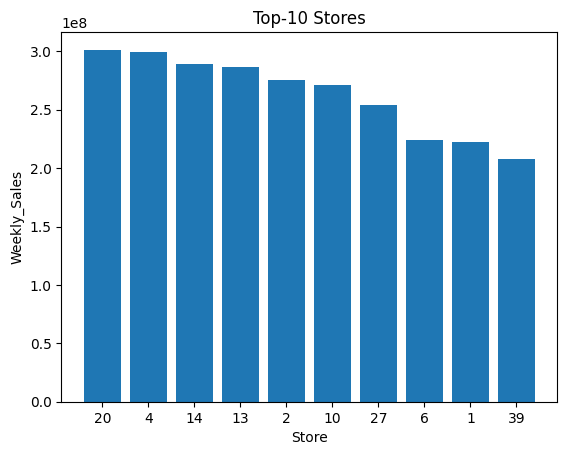

In [18]:
# create a frequency table for top 10 stores
top_n=10
x_col='Store'
y_col='Weekly_Sales'

table =df.groupby(x_col)[y_col].sum().sort_values(ascending=False)

# do a bar plot to showing the top 10 stores
plt.bar(table.index[:top_n],table.values[:top_n])
plt.title("Top-10 Stores")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

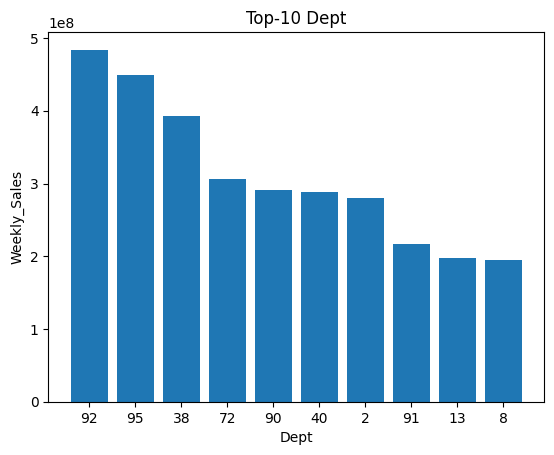

In [19]:
# create frequency table for top 10 departments
top_n=10
x_col='Dept'
y_col='Weekly_Sales'

table=df.groupby(x_col)[y_col].sum().sort_values(ascending=False)

# plot a bar plot for showing the top 10 department wise weekly sales
plt.bar(table.index[:top_n],table.values[:top_n])
plt.title("Top-10 Dept")
plt.xlabel("Dept")
plt.ylabel("Weekly_Sales")
plt.show()

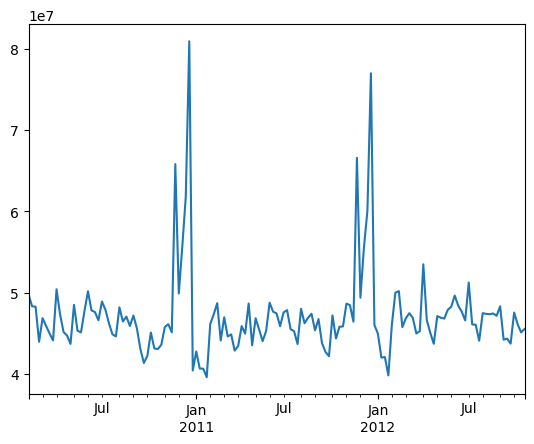

In [20]:
# check weekly sales
data=df.groupby('Date')['Weekly_Sales'].sum()
data.plot()
plt.xlabel(None)
plt.show()

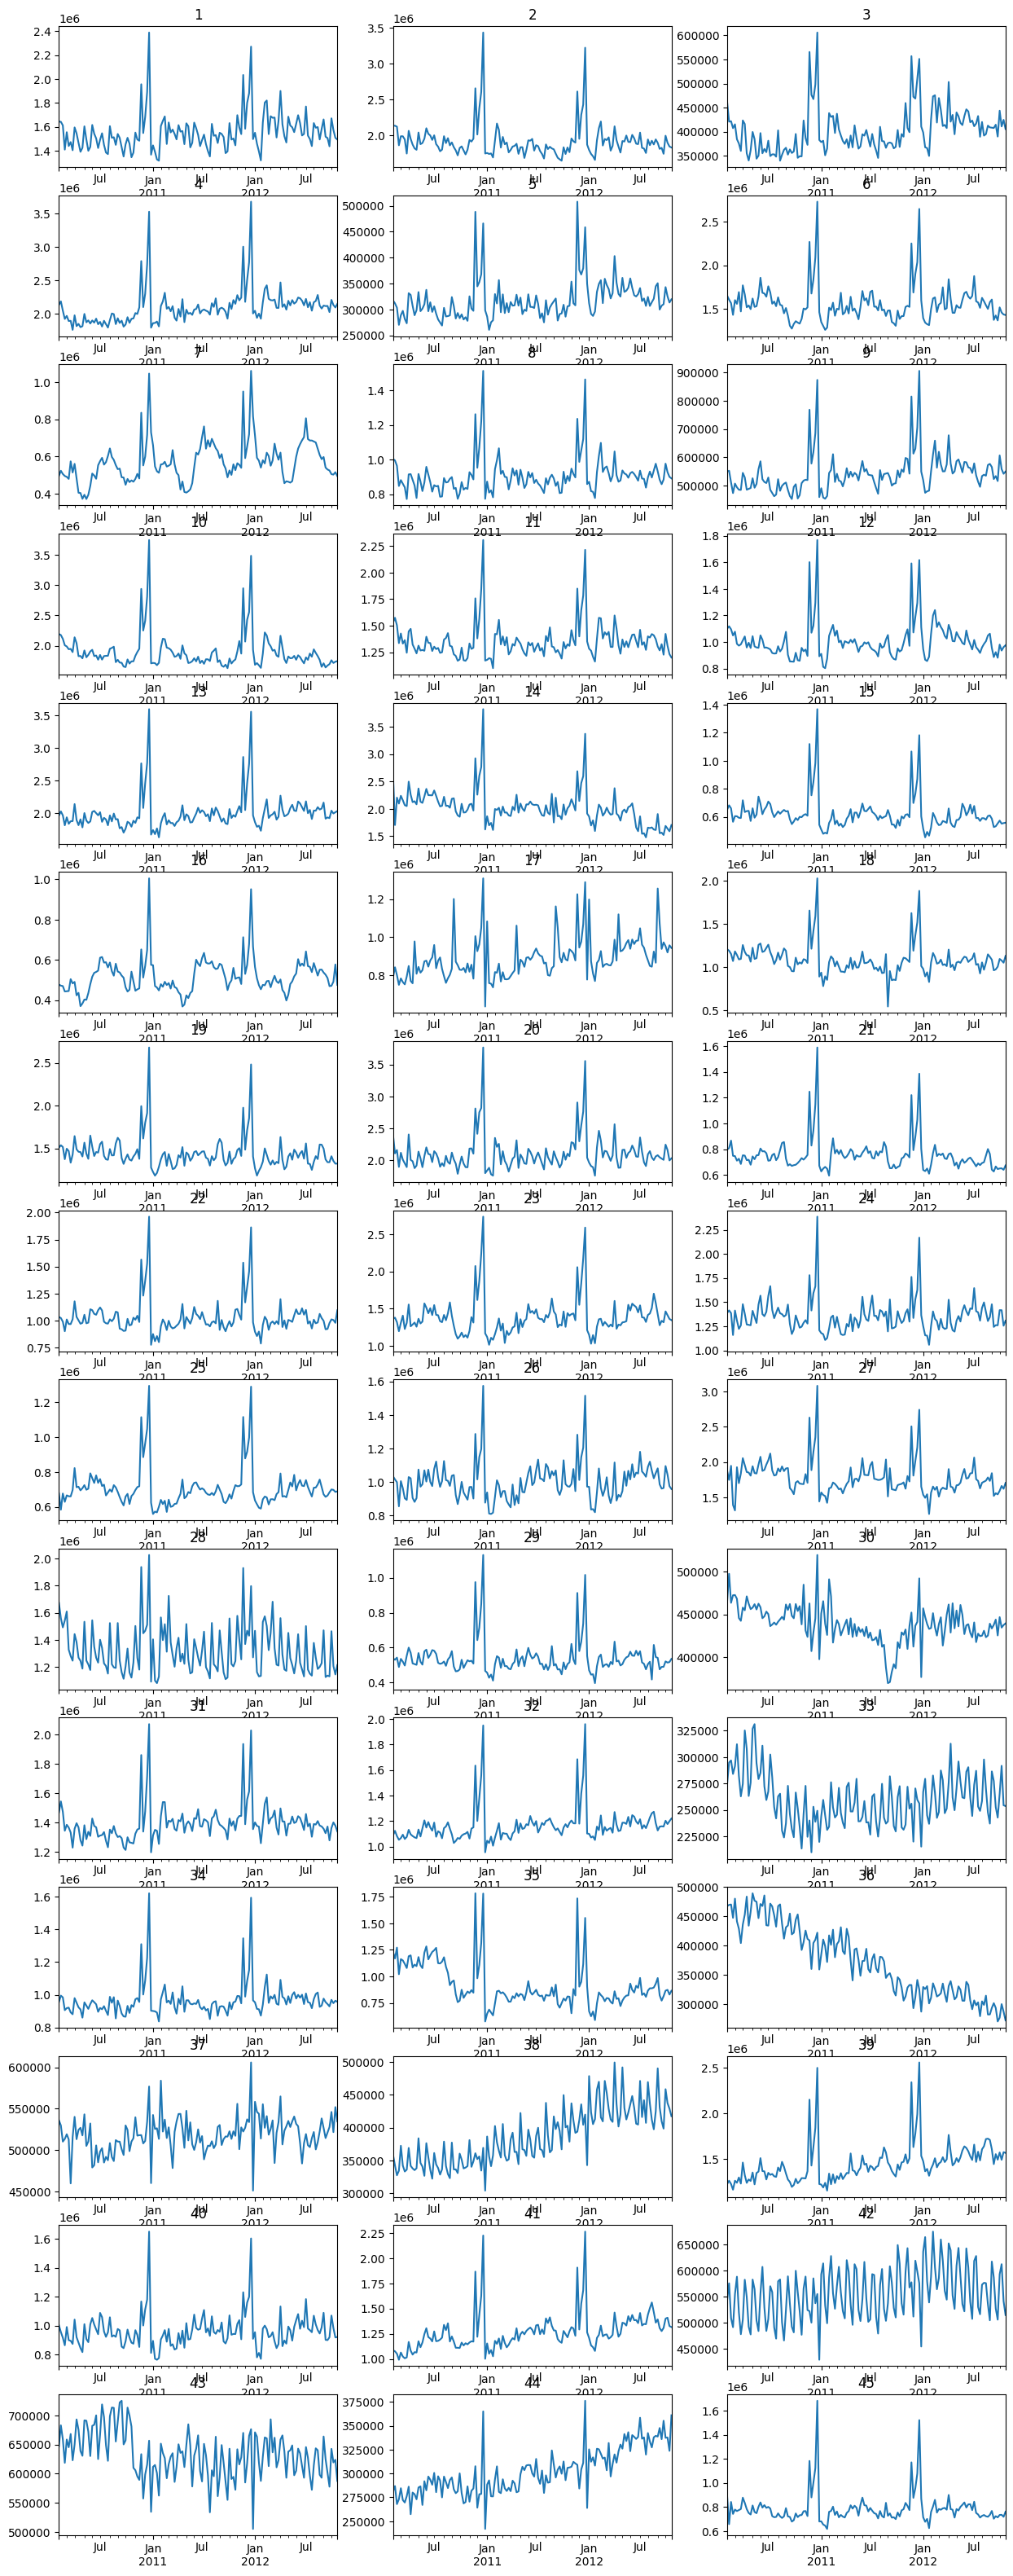

In [21]:
# Storewise Weekly sales
plt.figure(figsize=(15,40))
for store, df_store in df.groupby('Store'):
    data=df_store.groupby('Date')['Weekly_Sales'].sum()
    plt.subplot(15,3,int(store))
    data.plot()
    plt.title(store)
    plt.xlabel(None)

plt.show()

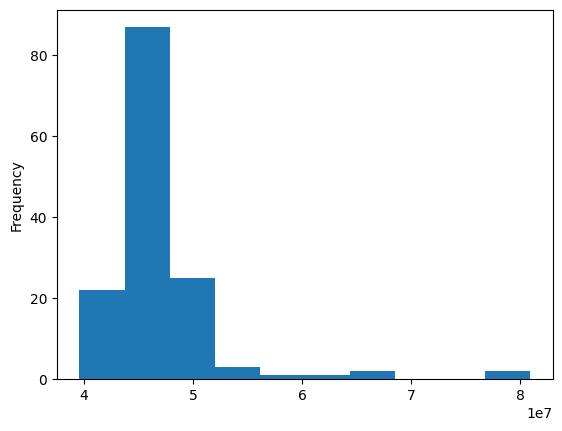

In [22]:
# Weekly Sales Distribution
data=df.groupby("Date")['Weekly_Sales'].sum()
data.plot.hist()
plt.show()

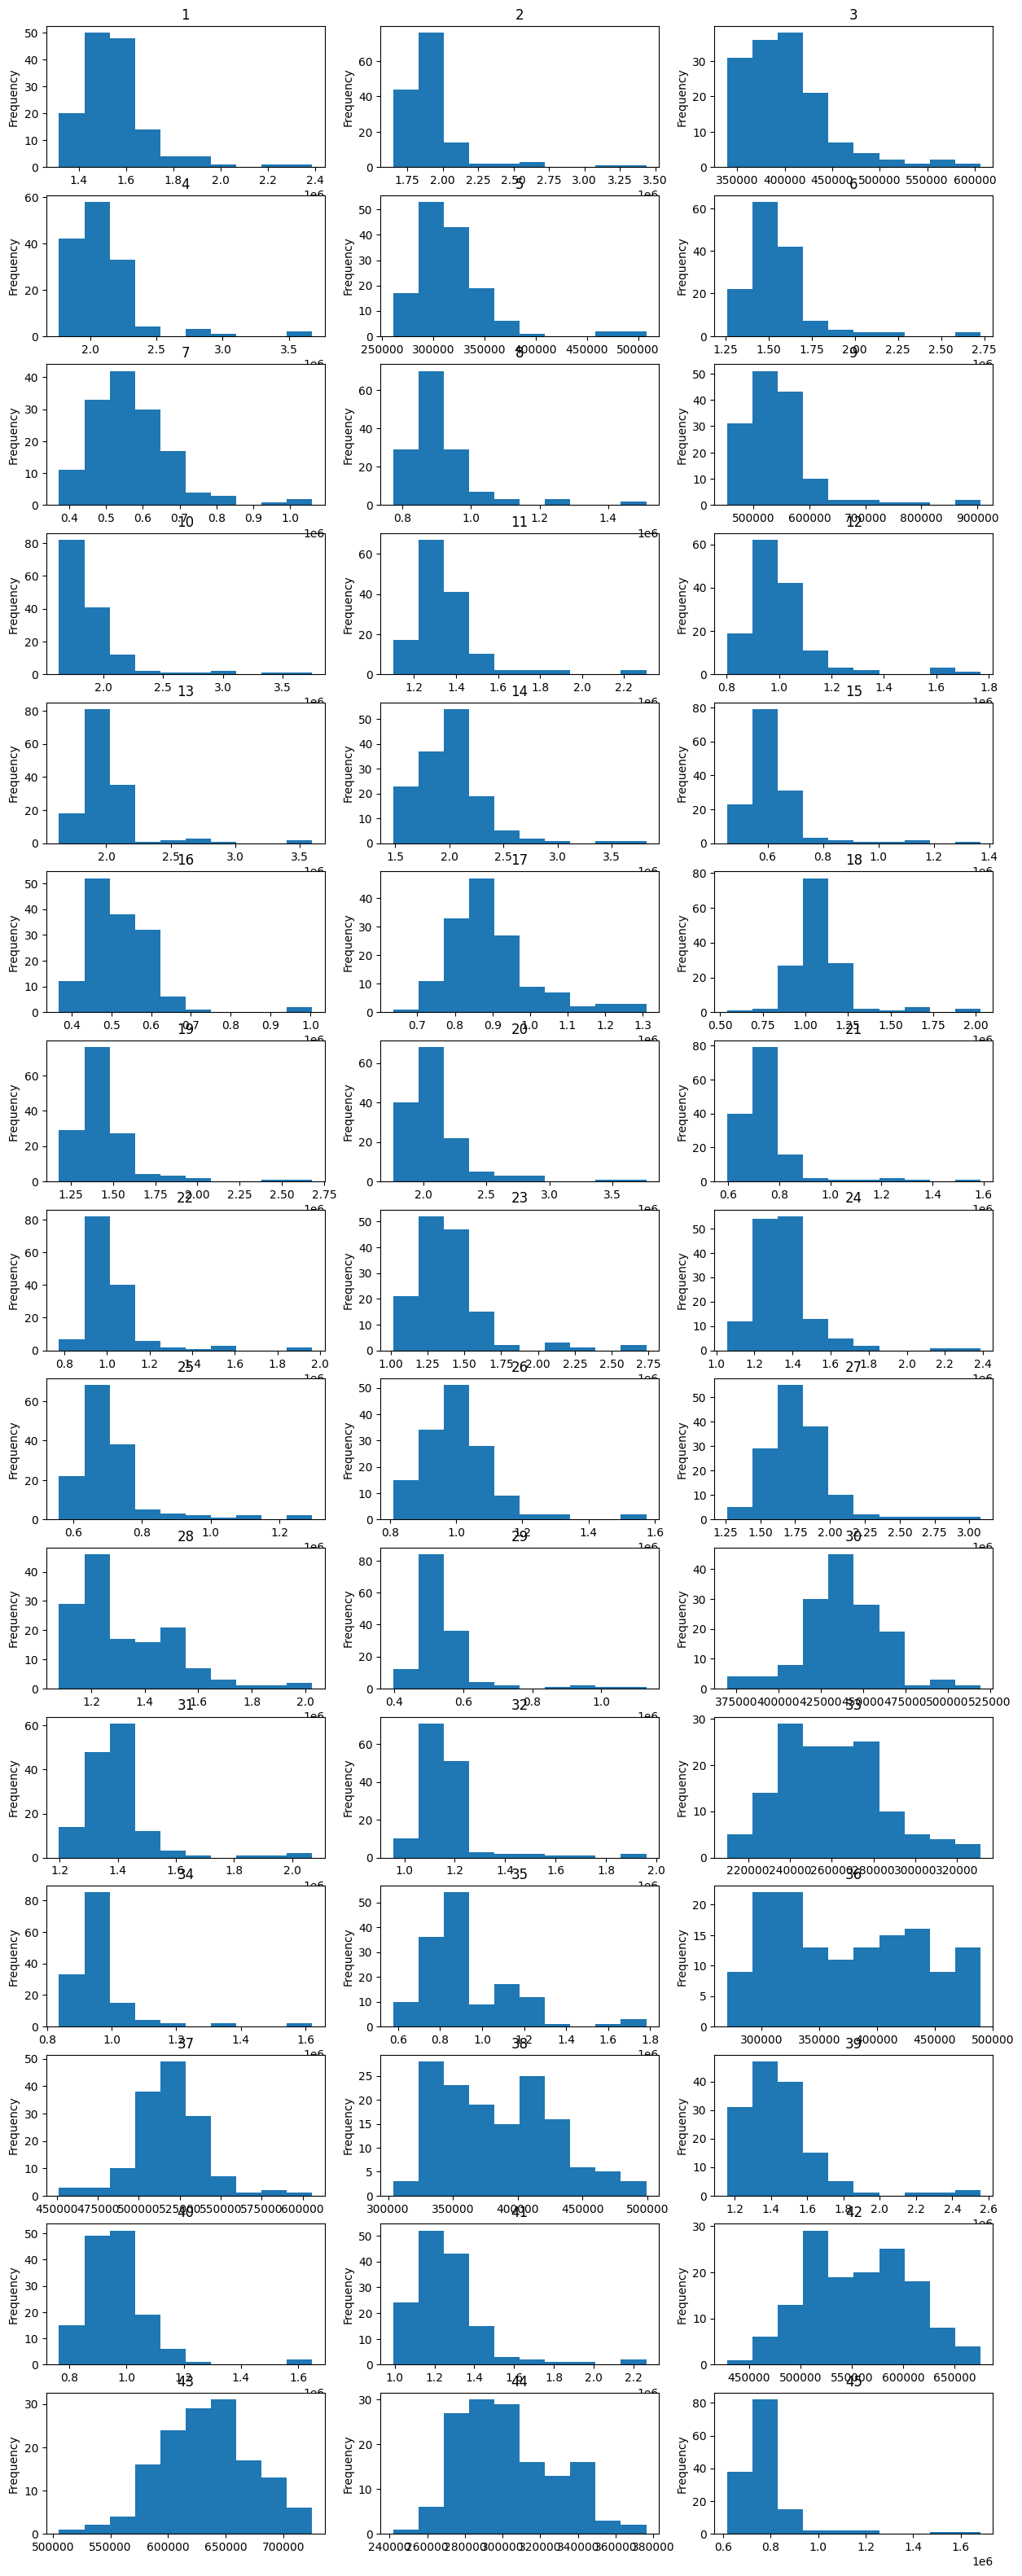

In [23]:
# Storewise Weekly Sales Distribution
plt.figure(figsize=(15,40))
for store,df_store in df.groupby('Store'):
    data=df_store.groupby(['Date'])['Weekly_Sales'].sum()
    plt.subplot(15,3,int(store))
    data.plot.hist()
    plt.title(store)
    plt.xlabel(None)

plt.show()

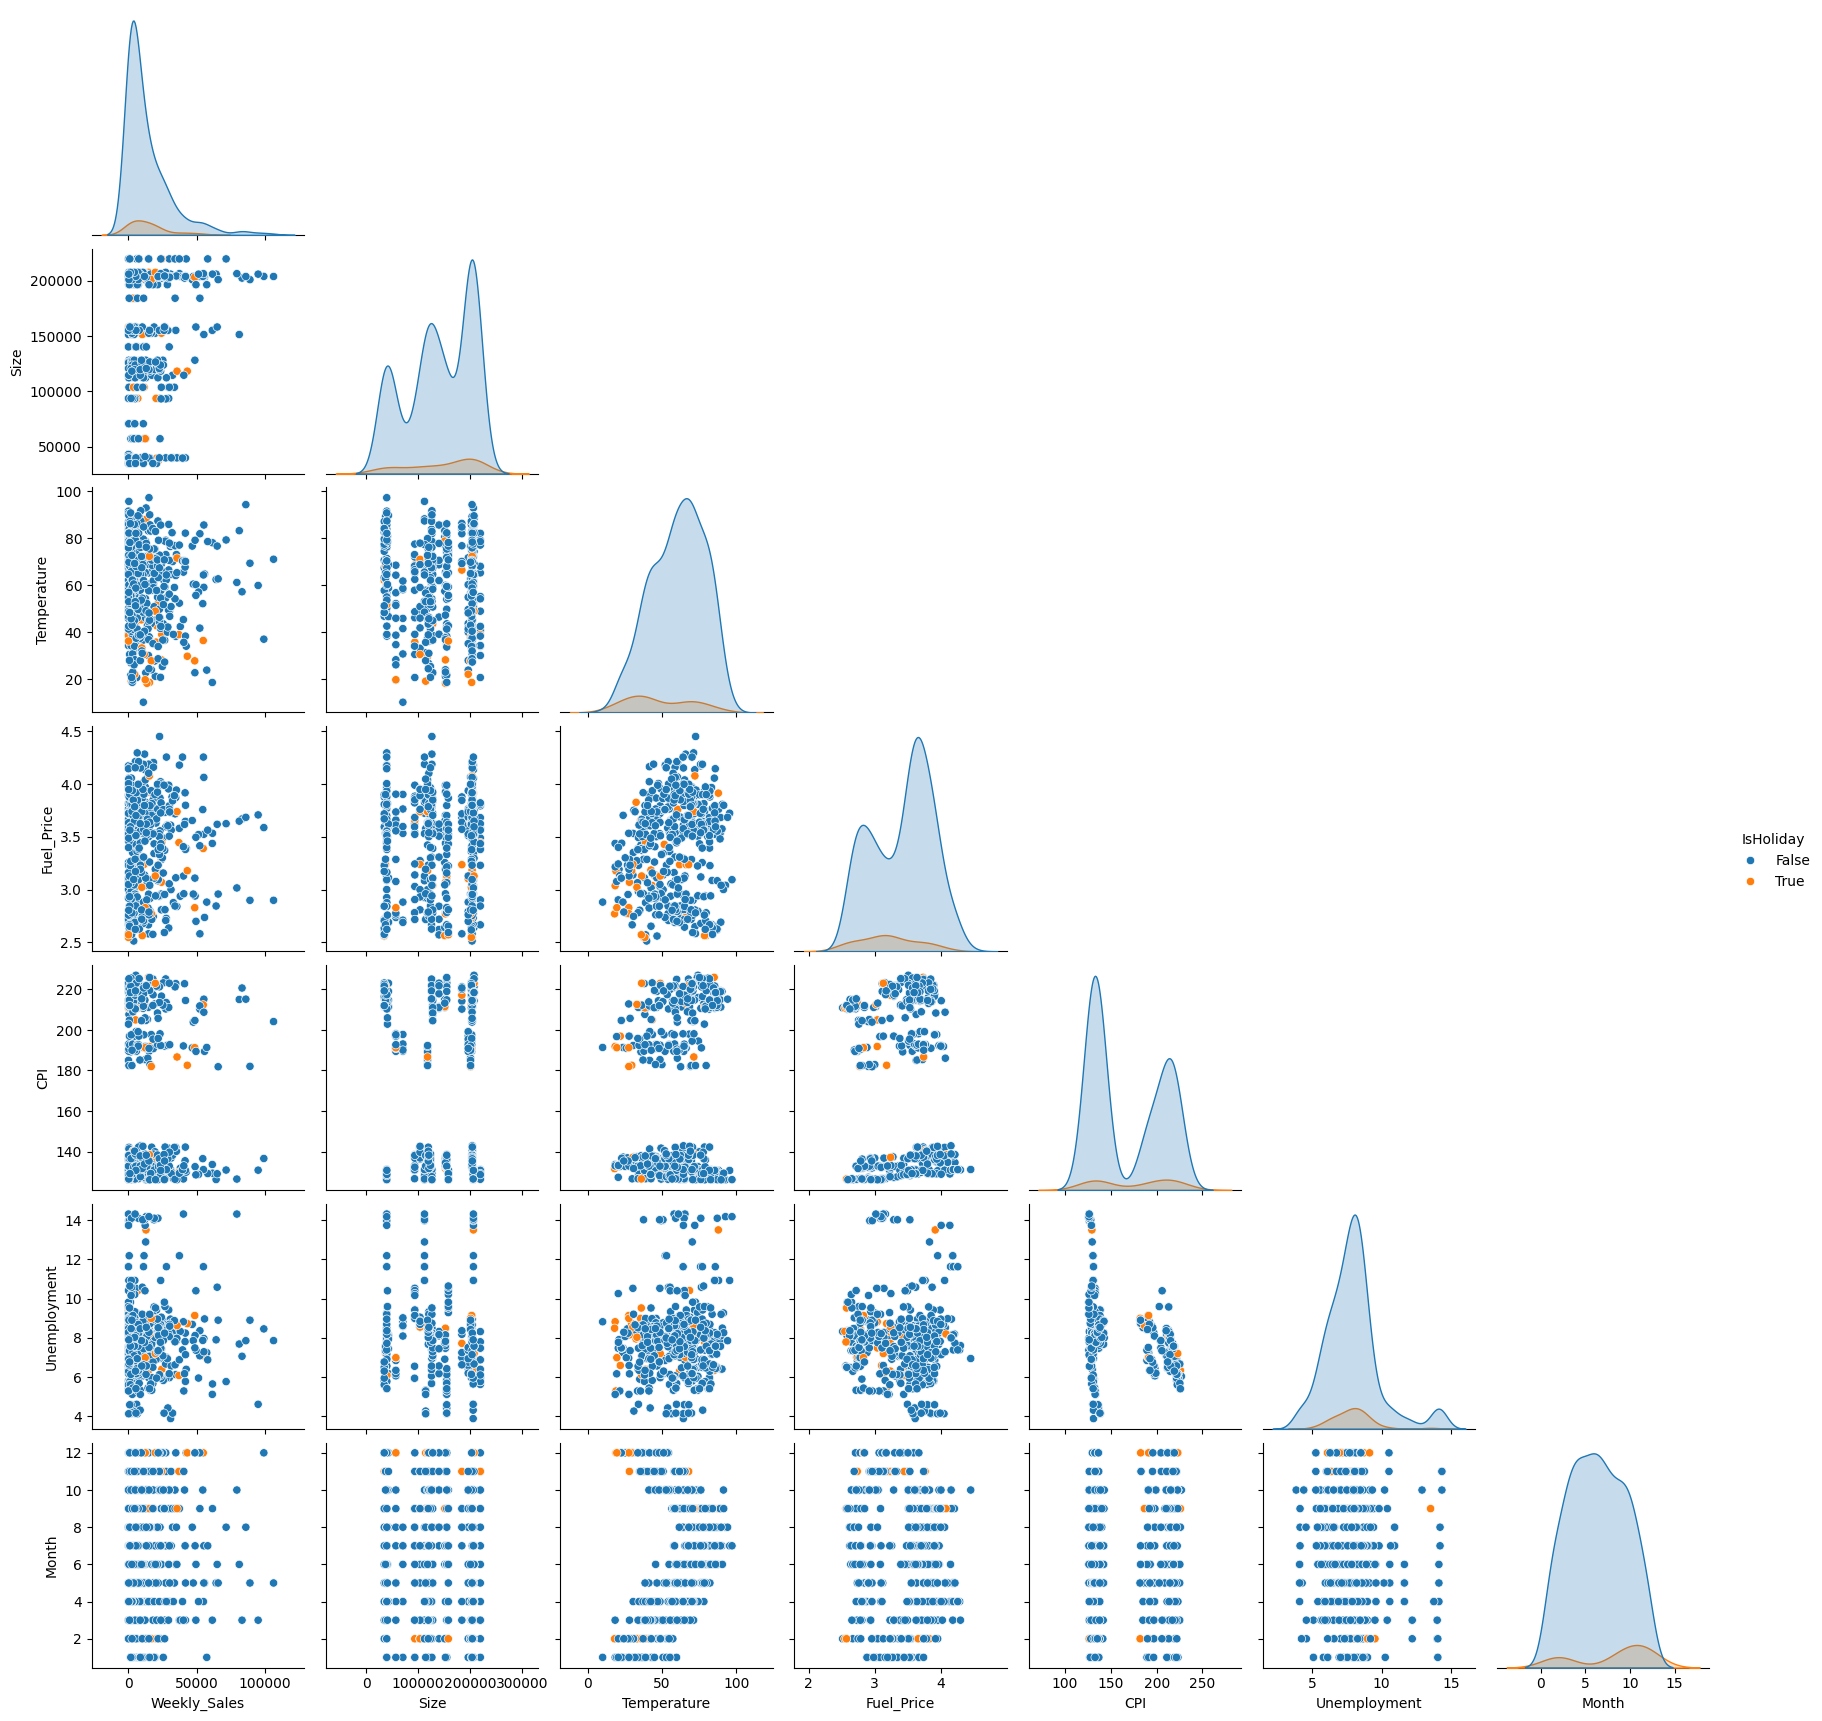

In [24]:
# taking samples from the original dataset to plot the pair plot
sns.pairplot(df.sample(500,random_state=5),hue="IsHoliday",corner=True)
plt.show()

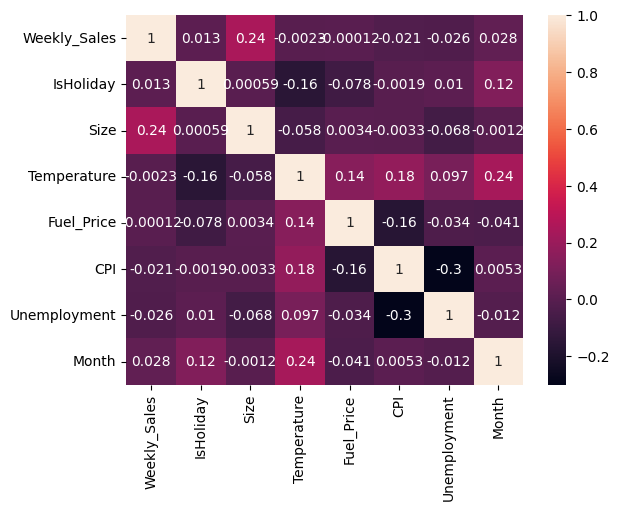

In [25]:
# showing the correlation matrix for numeric columns
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [26]:
one_hot_encoded_stores=OneHotEncoder(drop='first',max_categories=10,sparse_output=False).fit(df[["Store"]])
one_hot_encoded_stores

OneHotEncoder(drop='first', max_categories=10, sparse_output=False)

In [27]:
one_hot_encoded_stores.get_feature_names_out()

array(['Store_10', 'Store_13', 'Store_2', 'Store_20', 'Store_24',
       'Store_27', 'Store_34', 'Store_4', 'Store_infrequent_sklearn'],
      dtype=object)

In [28]:
df_one_hot_encoded_stores=pd.DataFrame(one_hot_encoded_stores.transform(df[['Store']]),columns=one_hot_encoded_stores.get_feature_names_out())
df_one_hot_encoded_stores['Weekly_Sales']=df['Weekly_Sales']

<Axes: >

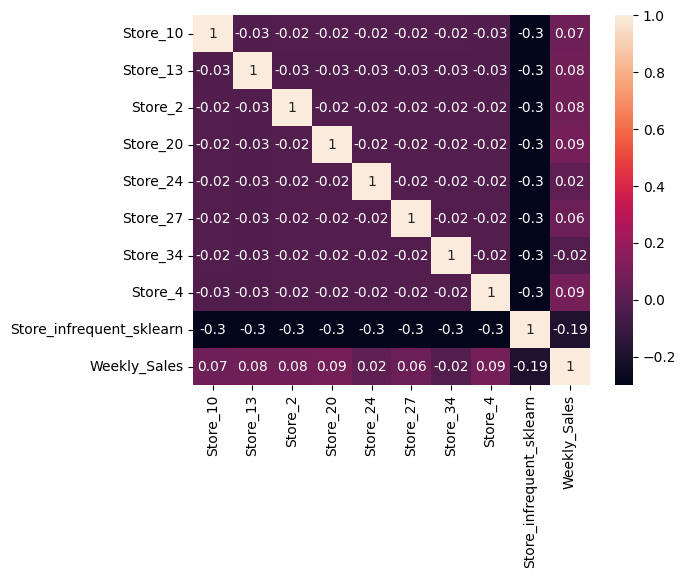

In [29]:
sns.heatmap(df_one_hot_encoded_stores.corr(numeric_only=True).round(2),annot=True)

<Axes: >

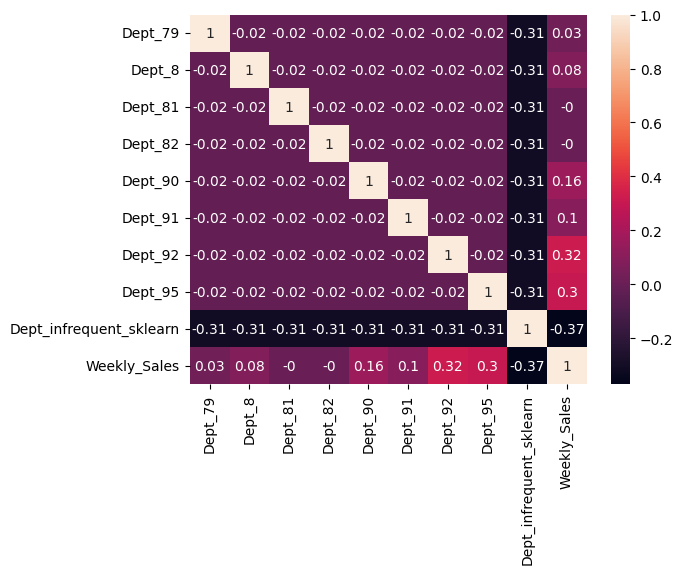

In [30]:
one_hot_encoded_dept=OneHotEncoder(drop='first',max_categories=10,sparse_output=False).fit(df[["Dept"]])
one_hot_encoded_dept.get_feature_names_out()
df_one_hot_encoded_dept=pd.DataFrame(one_hot_encoded_dept.transform(df[['Dept']]),columns=one_hot_encoded_dept.get_feature_names_out())
df_one_hot_encoded_dept['Weekly_Sales']=df['Weekly_Sales']
sns.heatmap(df_one_hot_encoded_dept.corr(numeric_only=True).round(2),annot=True)

In [31]:
numerical_cols= ["Size","Temperature","Fuel_Price","CPI","Unemployment"]
StandardScaler().fit_transform(df[numerical_cols])

array([[ 0.23920895, -0.96379804, -1.72083413,  1.01877417,  0.07820093],
       [ 0.23920895, -0.96379804, -1.72083413,  1.01877417,  0.07820093],
       [ 0.23920895, -0.96379804, -1.72083413,  1.01877417,  0.07820093],
       ...,
       [-0.30348902, -0.06721947,  1.13622153,  0.53900326,  0.37928066],
       [-0.30348902, -0.06721947,  1.13622153,  0.53900326,  0.37928066],
       [-0.30348902, -0.06721947,  1.13622153,  0.53900326,  0.37928066]])

In [32]:
SimpleImputer(missing_values=np.nan,strategy="mean").fit_transform(df[numerical_cols])

array([[1.51315000e+05, 4.23100000e+01, 2.57200000e+00, 2.11096358e+02,
        8.10600000e+00],
       [1.51315000e+05, 4.23100000e+01, 2.57200000e+00, 2.11096358e+02,
        8.10600000e+00],
       [1.51315000e+05, 4.23100000e+01, 2.57200000e+00, 2.11096358e+02,
        8.10600000e+00],
       ...,
       [1.18221000e+05, 5.88500000e+01, 3.88200000e+00, 1.92308899e+02,
        8.66700000e+00],
       [1.18221000e+05, 5.88500000e+01, 3.88200000e+00, 1.92308899e+02,
        8.66700000e+00],
       [1.18221000e+05, 5.88500000e+01, 3.88200000e+00, 1.92308899e+02,
        8.66700000e+00]])

## MODELING

In [33]:
numeric_preprocessor=Pipeline(
        steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
               ("scaler",StandardScaler())
        ])

categorical_preprocessor=Pipeline(
        steps=[("imputation_most_frequent",SimpleImputer(fill_value="missing",strategy="most_frequent")),
               ("onehot",OneHotEncoder(handle_unknown="ignore",max_categories=12,drop='first'))
        ])

categorical_col=['Store','Dept','Type','IsHoliday']
numerical_col=['Size','Temperature','Fuel_Price','CPI','Unemployment']

Preprocessor=ColumnTransformer(
        [('categorical',categorical_preprocessor,categorical_col),
         ('numerical',numeric_preprocessor,numerical_col)

        ])

Preprocessor



ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_most_frequent',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                max_categories=12))]),
                                 ['Store', 'Dept', 'Type', 'IsHoliday']),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Size', 'Temperature', 'Fuel_Price', 'CPI',
                                  'Unemployment'])])